In [1]:
import numpy as np


# ✅ Patch numpy for DeepFace compatibility
if not hasattr(np, 'typeDict'):
    np.typeDict = np.sctypeDict
    



In [2]:
import pandas as pd
import os
import csv
import numpy as np
from PIL import Image
from glob import glob
from sklearn.metrics.pairwise import polynomial_kernel
from torchvision.models import inception_v3
from torchvision import transforms
from torch.nn.functional import adaptive_avg_pool2d
import torch


/opt/homebrew/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
pip install torchvision

  Using cached MarkupSafe-3.0.2-cp311-cp311-macosx_11_0_arm64.whl.metadata (4.0 kB)
Using cached MarkupSafe-3.0.2-cp311-cp311-macosx_11_0_arm64.whl (12 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spacy 3.7.6 requires requests<3.0.0,>=2.13.0, which is not installed.
accelerate 1.1.1 requires pyyaml, which is not installed.

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install insightface


  Using cached insightface-0.7.3-cp311-cp311-macosx_13_0_arm64.whl
  Using cached onnx-1.17.0-cp311-cp311-macosx_12_0_universal2.whl.metadata (16 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached scikit_image-0.25.2-cp311-cp311-macosx_12_0_arm64.whl.metadata (14 kB)
  Using cached easydict-1.13-py3-none-any.whl.metadata (4.2 kB)
  Using cached Cython-3.0.12-py2.py3-none-any.whl.metadata (3.3 kB)
  Using cached albumentations-2.0.5-py3-none-any.whl.metadata (41 kB)
  Using cached prettytable-3.16.0-py3-none-any.whl.metadata (33 kB)
  Using cached PyYAML-6.0.2-cp311-cp311-macosx_11_0_arm64.whl.metadata (2.1 kB)
  Using cached albucore-0.0.23-py3-none-any.whl.metadata (5.3 kB)
  Using cached opencv_python_headless-4.11.0.86-cp37-abi3-macosx_13_0_arm64.whl.metadata (20 kB)
  Using cached simsimd-6.2.1-cp311-cp311-macosx_11_0_arm64.whl.metadata (66 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached imageio-2.37.0-py3-none-any.whl

In [6]:
pip install onnxruntime


  Using cached coloredlogs-15.0.1-py2.py3-none-any.whl.metadata (12 kB)
  Using cached humanfriendly-10.0-py2.py3-none-any.whl.metadata (9.2 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.6/33.6 MB 18.2 MB/s eta 0:00:0000:0100:01
Using cached coloredlogs-15.0.1-py2.py3-none-any.whl (46 kB)
Using cached humanfriendly-10.0-py2.py3-none-any.whl (86 kB)

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import insightface
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import cv2
import numpy as np


import cv2
import numpy as np
from insightface.app import FaceAnalysis

# Initialize InsightFace model
app = FaceAnalysis(name='buffalo_l', providers=['CPUExecutionProvider'])
app.prepare(ctx_id=0)
genderage_model = app.models.get('genderage')
session = genderage_model.session

def estimate_age_from_cropped(img_path):
    img = cv2.imread(img_path)
    if img is None:
        print("❌ Failed to load image.")
        return None, None

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img_rgb, (96, 96)).astype(np.float32)
    blob = np.transpose(img_resized, (2, 0, 1))
    blob = np.expand_dims(blob, axis=0)

    input_name = session.get_inputs()[0].name
    output = session.run(None, {input_name: blob})[0]

    # Extract values
    female_score = output[0][0]
    male_score = output[0][1]
    age_score = output[0][2]  # normalized age value in [0, 1]

    gender = "male" if male_score > female_score else "female"
    age = age_score * 100

    return age, gender


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/koppisettyeashameher/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/koppisettyeashameher/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/koppisettyeashameher/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/koppisettyeashameher/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/koppisettyeashameher/.insightface/model

In [7]:
pip install deepface


  Using cached deepface-0.0.93-py3-none-any.whl.metadata (30 kB)
  Using cached gdown-5.2.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached opencv_python-4.11.0.86-cp37-abi3-macosx_13_0_arm64.whl.metadata (20 kB)
  Using cached flask-3.1.0-py3-none-any.whl.metadata (2.7 kB)
  Using cached flask_cors-5.0.1-py3-none-any.whl.metadata (961 bytes)
  Using cached mtcnn-1.0.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached retina_face-0.0.17-py3-none-any.whl.metadata (10 kB)
  Using cached fire-0.7.0-py3-none-any.whl
  Using cached gunicorn-23.0.0-py3-none-any.whl.metadata (4.4 kB)
  Using cached itsdangerous-2.2.0-py3-none-any.whl.metadata (1.9 kB)
  Using cached blinker-1.9.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached lz4-4.4.4-cp311-cp311-macosx_11_0_arm64.whl.metadata (3.8 kB)
  Using cached PySocks-1.7.1-py3-none-any.whl.metadata (13 kB)
Using cached deepface-0.0.93-py3-none-any.whl (108 kB)
Using cached flask-3.1.0-py3-none-any.whl (102 kB)
Using cached flask_cors-5.0.1-py3-n

In [4]:
import os 
import cv2
from deepface import DeepFace

"""Contains helper methods for evaluateModel.py"""

def parse_filename_metadata(filename):
    parts = filename.split("_")
    try:
        if "aged_" in filename:
            age = int(filename.split("aged_")[-1].split(".")[0])
            gender = None  # gender may not be parsable in aged outputs
        else:
            age = int(parts[0])
            gender = "male" if parts[1] == "0" else "female"
        return age, gender
    except Exception:
        return None, None

def compute_blurriness(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        return None
    return cv2.Laplacian(img, cv2.CV_64F).var()

def detect_expression(img_path):
    try:
        analysis = DeepFace.analyze(img_path, actions=['emotion'], enforce_detection=False)
        return analysis[0]['dominant_emotion']
    except Exception as e:
        print(f"❌ Error analyzing {img_path}: {e}")
        return None

def evaluate_folder(inputs):
    """
    Accepts either a folder path or a list of image paths.
    Returns list of evaluation results for each image.
    """
    results = []

    if isinstance(inputs, str):
        from glob import glob
        inputs = glob(os.path.join(inputs, "*.jpg"))

    for img_path in inputs:
        fname = os.path.basename(img_path)
        actual_age, actual_gender = parse_filename_metadata(fname)
        predicted_age, predicted_gender = estimate_age_from_cropped(img_path)
        blurriness = compute_blurriness(img_path)
        expression = detect_expression(img_path)

        results.append({
            "filename": fname,
            "actual_age": actual_age,
            "predicted_age": predicted_age,
            "actual_gender": actual_gender,
            "predicted_gender": predicted_gender,
            "blurriness": blurriness,
            "expression": expression
        })

    return results

def save_results_to_csv(results, path):
    os.makedirs(os.path.dirname(path), exist_ok=True)
    with open(path, "w", newline="") as f:
        writer = csv.DictWriter(f, fieldnames=results[0].keys())
        writer.writeheader()
        writer.writerows(results)


In [5]:
pip install tf-keras

  Using cached tf_keras-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached tensorflow-2.19.0-cp311-cp311-macosx_12_0_arm64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached ml_dtypes-0.5.1-cp311-cp311-macosx_10_9_universal2.whl.metadata (21 kB)
Using cached tf_keras-2.19.0-py3-none-any.whl (1.7 MB)
Using cached tensorflow-2.19.0-cp311-cp311-macosx_12_0_arm64.whl (252.6 MB)
Using cached ml_dtypes-0.5.1-cp311-cp311-macosx_10_9_universal2.whl (671 kB)
Using cached tensorboard-2.19.0-py3-none-any.whl (5.5 MB)
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
  

In [ ]:
%ls


data/                          outputs_part2.csv  outputs_part9.csv
DL_model-adding 5 years.ipynb  outputs_part3.csv  subset150/
DL_model_addRandomAge.ipynb    outputs_part4.csv  Untitled.ipynb
evaluationPipeline.ipynb       outputs_part6.csv  utk_train_balanced.csv
outputs/                       outputs_part7.csv
outputs_part1.csv              outputs_part8.csv


In [5]:
OUTPUT_CSV_BASELINE = "outputs/eval_outputs_baseline.csv"
CLEAN_IMAGE_FOLDER_BASELINE = "subset150"
AGED_IMAGE_FOLDER_BASELINE = "outputs/baselines"
VISUAL_CSVS_BASELINE = [f"outputs_part{i}.csv" for i in {1,2,3,4,6,7,8,9}]

OUTPUT_CSV = "outputs/eval_outputs_finetuned.csv"
CLEAN_IMAGE_FOLDER = "subset150"
AGED_IMAGE_FOLDER = "outputs/finetuned"
VISUAL_CSVS = [f"outputs_part{i}.csv" for i in {1,2,3,4,6,7,8,9}]

In [6]:
print("📦 Loading all batch metadata for baseline model...")
df = pd.concat([pd.read_csv(csv_path) for csv_path in VISUAL_CSVS_BASELINE], ignore_index=True)
df.to_csv(OUTPUT_CSV_BASELINE, index=False)
print(f"✅ Combined CSV saved to: {OUTPUT_CSV_BASELINE}")


print("📦 Loading all batch metadata for finetuned model...")
df = pd.concat([pd.read_csv(csv_path) for csv_path in VISUAL_CSVS], ignore_index=True)
df.to_csv(OUTPUT_CSV, index=False)
print(f"✅ Combined CSV saved to: {OUTPUT_CSV}")

📦 Loading all batch metadata for baseline model...
✅ Combined CSV saved to: outputs/eval_outputs_baseline.csv
📦 Loading all batch metadata for finetuned model...
✅ Combined CSV saved to: outputs/eval_outputs_finetuned.csv


In [6]:
print("🔍 Evaluating generated and original images for baseline model...")


df = pd.read_csv("outputs/eval_outputs_baseline.csv")
baseline_paths = df["baseline3_image_path"].dropna().tolist()


generated_results_baseline = evaluate_folder(AGED_IMAGE_FOLDER_BASELINE)
original_results_baseline = evaluate_folder(CLEAN_IMAGE_FOLDER_BASELINE)


save_results_to_csv(generated_results_baseline, "data/csv/generated_results_baseline.csv")
save_results_to_csv(original_results_baseline, "data/csv/original_results_baseline.csv")





🔍 Evaluating generated and original images for baseline model...


In [ ]:
print("Sample aged file:", os.listdir(AGED_IMAGE_FOLDER_BASELINE)[:3])
print("Sample clean file:", os.listdir(CLEAN_IMAGE_FOLDER_BASELINE)[:3])


Sample aged file: ['.ipynb_checkpoints', '10_0_1_20170110225121326.jpg_aged_15.jpg', '10_1_1_20170109203520178.jpg_aged_15.jpg']
Sample clean file: ['100_1_0_20170110183726390.jpg', '100_1_2_20170110182836729.jpg', '10_0_1_20170110225121326.jpg']


In [7]:
def compute_mae(results):
    vals = [abs(r['predicted_age'] - r['actual_age']) for r in results
            if r['predicted_age'] is not None and r['actual_age'] is not None]
    return sum(vals) / len(vals) if vals else None

def compute_gender_preservation(results):
    matches = [1 for r in results
               if r['actual_gender'] and r['predicted_gender'] and
               r['actual_gender'].lower() == r['predicted_gender'].lower()]
    return (sum(matches) / len(results)) * 100 if results else None

def compute_average_blurriness(results):
    vals = [r['blurriness'] for r in results if r['blurriness'] is not None]
    return sum(vals) / len(vals) if vals else None

def match_by_filename(orig, aged):
    aged_dict = {r['filename']: r for r in aged}
    return [(o, aged_dict[o['filename']]) for o in orig if o['filename'] in aged_dict]

def compute_expression_preservation(pairs):
    correct = sum(1 for o, a in pairs
                  if o['expression'] and a['expression'] and
                  o['expression'].lower() == a['expression'].lower())
    return (correct / len(pairs)) * 100 if pairs else None

In [35]:
mae_baseline = compute_mae(generated_results_baseline)
gender_pres_baseline = 100-compute_gender_preservation(generated_results_baseline)
blurriness_baseline = compute_average_blurriness(generated_results_baseline)
matched_baseline = match_by_filename(original_results_baseline, generated_results_baseline)
expression_pres_baseline = compute_expression_preservation(matched_baseline)

print("Baseline model results:")
print(f"\n📊 Evaluation Results")
print(f"✅ Mean Absolute Error (MAE): {mae_baseline:.2f}")
print(f"✅ Gender Preservation: {gender_pres_baseline:.2f}%")
print(f"🔍 Avg. Sharpness (Laplacian Var): {blurriness_baseline:.2f}")
if expression_pres_baseline is not None:
    print(f"😊 Expression Preservation: {expression_pres_baseline:.2f}%")
else:
    print("😊 Expression Preservation: N/A (no valid pairs)")



Baseline model results:

📊 Evaluation Results
✅ Mean Absolute Error (MAE): 20.61
✅ Gender Preservation: 100.00%
🔍 Avg. Sharpness (Laplacian Var): 296.88
😊 Expression Preservation: N/A (no valid pairs)


In [8]:
import matplotlib.pyplot as plt
import math
from PIL import Image
import os

def show_gender_mismatches(results, image_folder, num_samples=10, images_per_row=5):
    mismatches = []
    for r in results:
        if r['actual_gender'] and r['predicted_gender']:
            if r['actual_gender'].strip().lower() != r['predicted_gender'].strip().lower():
                mismatches.append(r)

    if not mismatches:
        print("✅ No gender mismatches found.")
        return

    num_samples = min(num_samples, len(mismatches))
    num_rows = math.ceil(num_samples / images_per_row)

    print(f"🔍 Showing {num_samples} gender mismatches ({images_per_row} per row)...")

    fig, axs = plt.subplots(num_rows, images_per_row, figsize=(images_per_row * 4, num_rows * 4))
    axs = axs.flatten() if num_samples > 1 else [axs]

    for i in range(images_per_row * num_rows):
        ax = axs[i]
        if i < num_samples:
            r = mismatches[i]
            img_path = os.path.join(image_folder, r['filename'])
            try:
                img = Image.open(img_path).convert("RGB")
                ax.imshow(img)
                ax.axis("off")
                ax.set_title(
                    f"{r['filename']}\nActual: {r['actual_gender']}, Pred: {r['predicted_gender']}",
                    fontsize=9
                )
            except Exception as e:
                ax.axis("off")
                print(f"❌ Could not open image: {r['filename']} — {e}")
        else:
            ax.axis("off")  # Hide unused subplots

    plt.tight_layout()
    plt.show()


In [13]:
results_baseline = evaluate_folder("outputs/baselines")  # Or wherever your aged images are
print("showing baseline model gender mismatch")
show_gender_mismatches(results_baseline, "outputs/baselines", num_samples=15)
#seems like an issue with gender predictor in evaluation... after checking images the gender is preserved

showing baseline model gender mismatch
✅ No gender mismatches found.


In [15]:
import matplotlib.pyplot as plt

def plot_mae_distribution(results_baseline, bins=20):
    errors = [
        abs(r['predicted_age'] - r['actual_age'])
        for r in results_baseline
        if r['predicted_age'] is not None and r['actual_age'] is not None
    ]
    
    if not errors:
        print("⚠️ No valid age data to plot.")
        return

    plt.figure(figsize=(8, 5))
    plt.hist(errors, bins=bins, color="skyblue", edgecolor="black")
    plt.title("MAE Distribution (|Predicted Age - Actual Age|)")
    plt.xlabel("Absolute Error (years)")
    plt.ylabel("Number of Images")
    plt.grid(True)
    plt.show()


Baseline MAE age distribution 


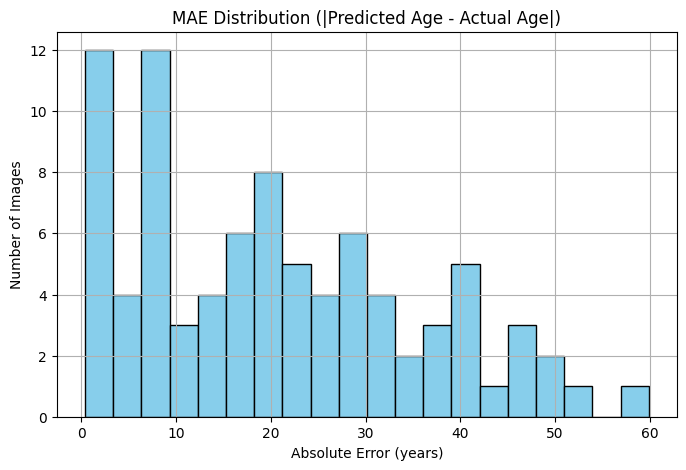

In [36]:
print("Baseline MAE age distribution ")
plot_mae_distribution(results_baseline)


In [18]:
import matplotlib.pyplot as plt
import math
from PIL import Image
import os

def show_aged_age_predictions(results, image_folder, num_samples=6):
    """
    Show up to `num_samples` aged images with actual vs predicted age.
    Displays 2 images per row.
    """
    valid_results = [
        r for r in results
        if r['actual_age'] is not None and r['predicted_age'] is not None
    ]

    if not valid_results:
        print("⚠️ No valid age results to display.")
        return

    num_samples = min(num_samples, len(valid_results))
    num_rows = math.ceil(num_samples / 2)

    print(f"🧓 Showing {num_samples} aged images (2 per row)...")

    fig, axs = plt.subplots(num_rows, 2, figsize=(10, 5 * num_rows))
    axs = axs.flatten() if num_rows > 1 else [axs[0], axs[1]]

    for idx in range(num_rows * 2):
        ax = axs[idx]

        if idx < num_samples:
            r = valid_results[idx]
            img_path = os.path.join(image_folder, r['filename'])

            try:
                img = Image.open(img_path).convert("RGB")
                ax.imshow(img)
                ax.axis("off")
                ax.set_title(
                    f"{r['filename']}\nActual: {r['actual_age']}, Pred: {r['predicted_age']:.1f}",
                    fontsize=9
                )
            except Exception as e:
                ax.axis("off")
                print(f"❌ Failed to open image: {r['filename']} — {e}")
        else:
            ax.axis("off")  # Hide empty subplot slots

    plt.tight_layout()
    plt.show()


Showing age mismatches for baseline model
🧓 Showing 6 aged images (2 per row)...


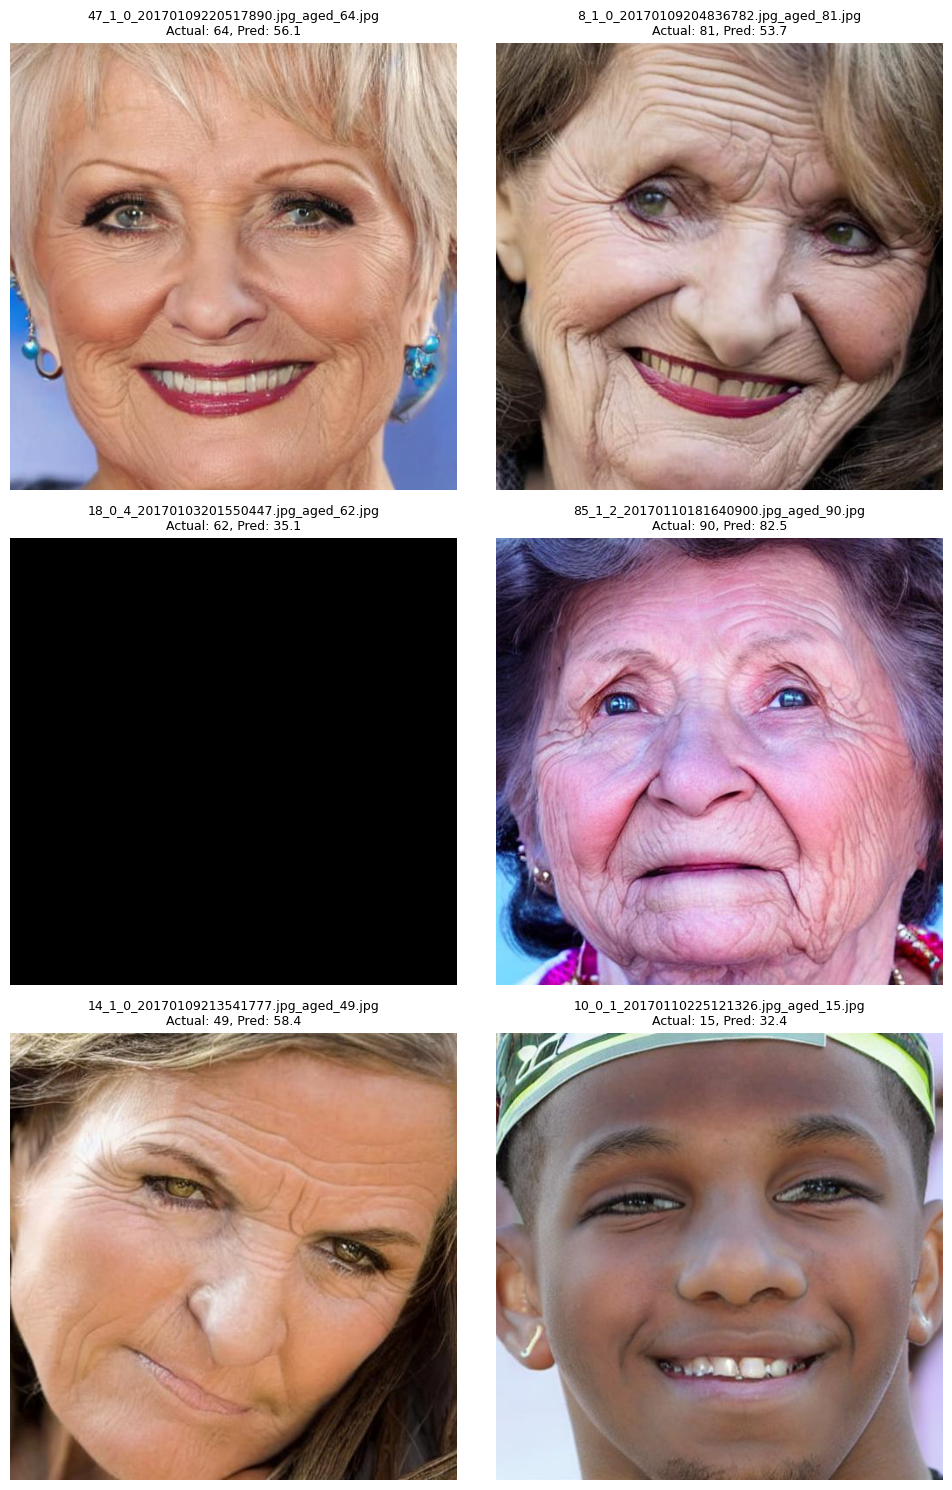

In [110]:
print("Showing age mismatches for baseline model")
show_aged_age_predictions(
    results=results_baseline,
    image_folder="outputs/baselines",
    num_samples=6  # or 10, 6, etc.
)



In [9]:
print("🔍 Evaluating generated and original images for finetuned model...")

generated_results_finetuned = evaluate_folder(AGED_IMAGE_FOLDER)
original_results_finetuned = evaluate_folder(CLEAN_IMAGE_FOLDER)

save_results_to_csv(generated_results_finetuned, "data/csv/generated_results_finetuned.csv")
save_results_to_csv(original_results_finetuned, "data/csv/original_results_finetuned.csv")


🔍 Evaluating generated and original images for finetuned model...


In [134]:
generated_results_finetuned = pd.read_csv("data/csv/generated_results_finetuned.csv")
generated_results_finetuned["actual_gender"] = generated_results_finetuned["actual_gender"].fillna("").astype(str)
generated_results_finetuned["predicted_gender"] = generated_results_finetuned["predicted_gender"].fillna("").astype(str)

generated_results_finetuned = generated_results_finetuned.to_dict(orient="records")


In [92]:
mae_finetuned = compute_mae(generated_results_finetuned)
gender_pres_finetuned = 100-compute_gender_preservation(generated_results_finetuned)
blurriness_finetuned = compute_average_blurriness(generated_results_finetuned)
matched_finetuned = match_by_filename(original_results_finetuned, generated_results_finetuned)
expression_pres_finetuned = compute_expression_preservation(matched_finetuned)
print("Finetuned model results:")
print(f"\n📊 Evaluation Results")
print(f"✅ Mean Absolute Error (MAE): {mae_finetuned:.2f}")
print(f"✅ Gender Preservation: {gender_pres_finetuned:.2f}%")
print(f"🔍 Avg. Sharpness (Laplacian Var): {blurriness_finetuned:.2f}")
if expression_pres_finetuned is not None:
    print(f"😊 Expression Preservation: {expression_pres_finetuned:.2f}%")
else:
    print("😊 Expression Preservation: N/A (no valid pairs)")


Finetuned model results:

📊 Evaluation Results
✅ Mean Absolute Error (MAE): 18.14
✅ Gender Preservation: 100.00%
🔍 Avg. Sharpness (Laplacian Var): 394.96
😊 Expression Preservation: N/A (no valid pairs)


In [89]:
show_gender_mismatches(generated_results_finetuned, "outputs/finetuned", num_samples=15)
#seems like an issue with gender predictor in evaluation... after checking images the gender is preserved

✅ No gender mismatches found.


Finetuned model MAE age distribution 


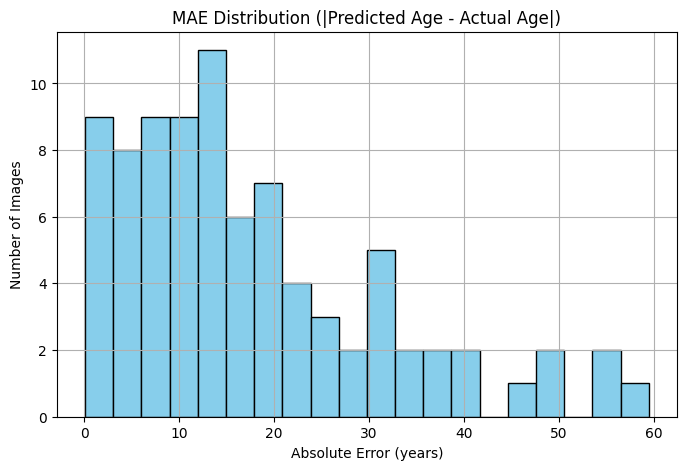

In [136]:
print("Finetuned model MAE age distribution ")
plot_mae_distribution(generated_results_finetuned)

Showing age mismatches for finetuned model
🧓 Showing 6 aged images (2 per row)...


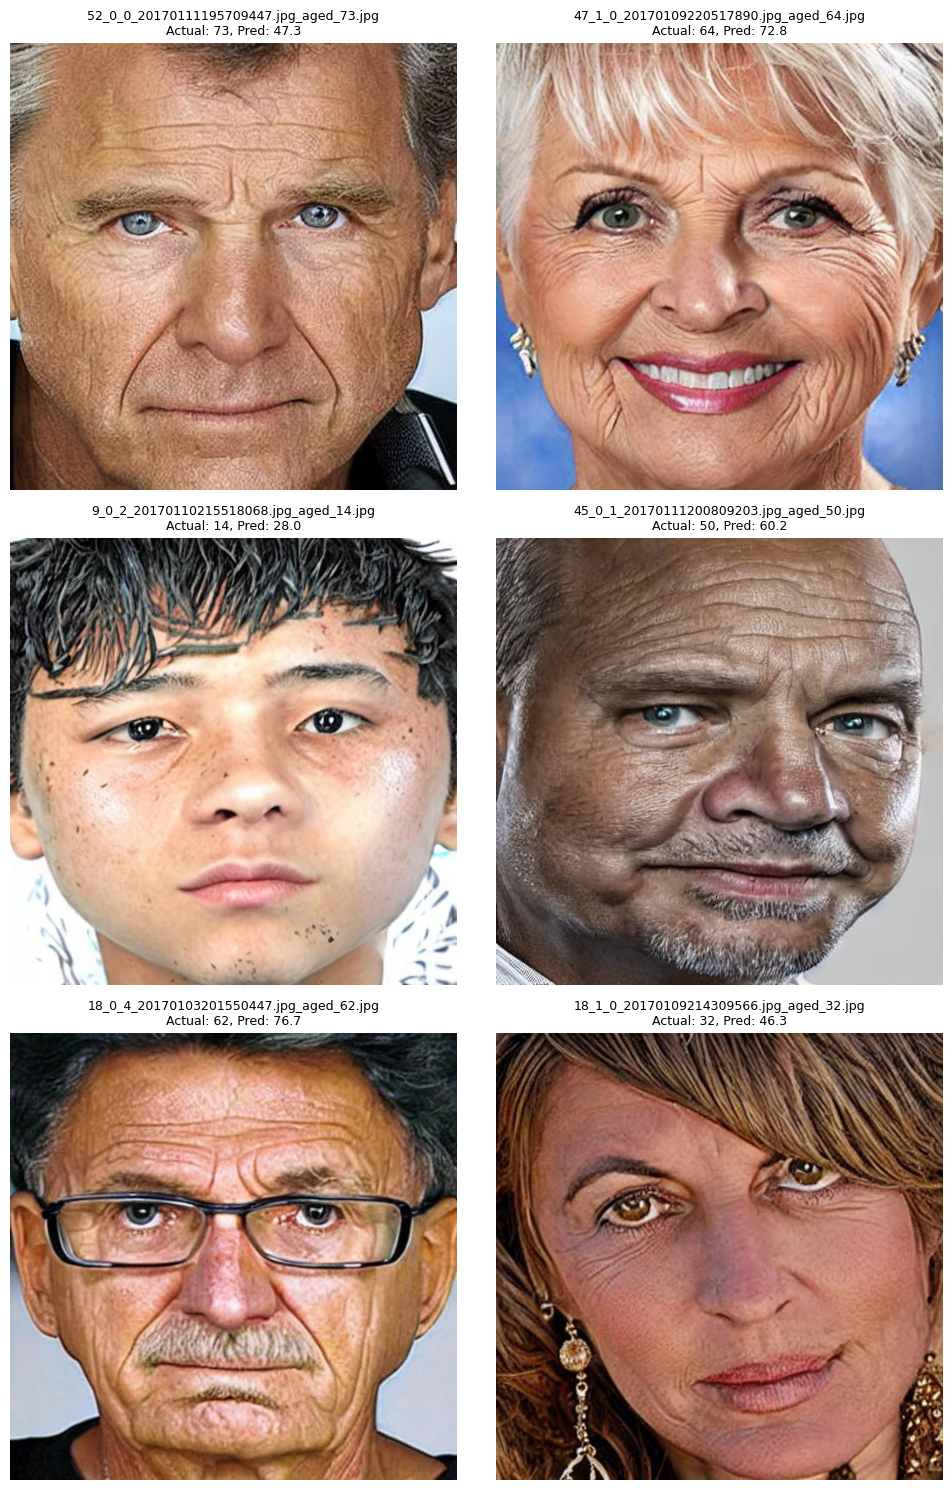

In [135]:
print("Showing age mismatches for finetuned model")
show_aged_age_predictions(
    results=generated_results_finetuned,
    image_folder="outputs/finetuned",
    num_samples=6  # or 10, 6, etc.
)


In [21]:
from insightface.app import FaceAnalysis
from sklearn.metrics.pairwise import cosine_similarity
from PIL import Image
import numpy as np
import os

# Initialize InsightFace once
face_analyzer = FaceAnalysis(name='buffalo_l', providers=['CPUExecutionProvider'])
face_analyzer.prepare(ctx_id=0)

from insightface.app import FaceAnalysis
from facenet_pytorch import MTCNN
from PIL import Image
import numpy as np
import torch
import os
import cv2

# Initialize both detectors
device = "cuda" if torch.cuda.is_available() else "cpu"

face_analyzer = FaceAnalysis(name='buffalo_l', providers=['CPUExecutionProvider'])
face_analyzer.prepare(ctx_id=0, det_size=(1024, 1024))

mtcnn = MTCNN(keep_all=False, device=device)

def pad_image(img, padding=40):
    return cv2.copyMakeBorder(
        img,
        padding, padding, padding, padding,
        borderType=cv2.BORDER_CONSTANT,
        value=[0, 0, 0]
    )

def get_face_embedding_with_mtcnn_fallback(image_path):
    try:
        print(f"🔍 Processing: {image_path}")
        img_pil = Image.open(image_path).convert("RGB")
        img_np = np.array(img_pil)

        # Pad image to help with tight crops
        img_padded = pad_image(img_np, padding=60)

        # Step 1: Try InsightFace on padded image
        faces = face_analyzer.get(img_padded)
        if faces and faces[0].embedding is not None:
            print("✅ InsightFace worked on padded image")
            return faces[0].embedding

        # Step 2: Try MTCNN on original PIL image
        print("⚠️ InsightFace failed — trying MTCNN fallback")
        face_cropped = mtcnn(img_pil)

        if face_cropped is None:
            print("❌ MTCNN also failed to detect face")
            return None

        # Convert cropped face to NumPy for InsightFace
        face_img_np = face_cropped.permute(1, 2, 0).int().cpu().numpy()
        faces_retry = face_analyzer.get(face_img_np)

        if faces_retry and faces_retry[0].embedding is not None:
            print("✅ Recovered using MTCNN fallback")
            return faces_retry[0].embedding

        print("❌ Still no face found after fallback")
    except Exception as e:
        print(f"❌ Error on {image_path}: {e}")
    return None

from deepface import DeepFace

def get_embedding_with_deepface(image_path):
    try:
        embedding_objs = DeepFace.represent(
            img_path=image_path,
            model_name="ArcFace",
            enforce_detection=False
        )
        if embedding_objs and isinstance(embedding_objs, list):
            print(f"✅ DeepFace extracted embedding for: {image_path}")
            return embedding_objs[0]["embedding"]
    except Exception as e:
        print(f"❌ DeepFace failed for {image_path}: {e}")
    return None






def compute_identity_similarity(original_folder, aged_folder):
    original_files = {
        f: os.path.join(original_folder, f)
        for f in os.listdir(original_folder)
        if f.lower().endswith((".jpg", ".jpeg", ".png"))
    }

    for item in original_files:
        print(item)
        
    aged_files = [
        f for f in os.listdir(aged_folder)
        if f.lower().endswith((".jpg", ".jpeg", ".png"))
    ]

    matched_pairs = []
    for aged_name in aged_files:
        # Extract original name from e.g., 47_1_0_...jpg_aged_64.jpg
        if "_aged_" in aged_name:
            base_name = aged_name.split("_aged_")[0]
            print(f"Base name: {base_name}")
            if base_name in original_files:
                matched_pairs.append((original_files[base_name], os.path.join(aged_folder, aged_name)))

    if not matched_pairs:
        print("⚠️ No matching filenames found between aged and original.")
        return None

    sims = []
    for orig_path, aged_path in matched_pairs:
        emb_orig = get_embedding_with_deepface(orig_path)
        emb_aged = get_embedding_with_deepface(aged_path)

        if emb_orig is not None and emb_aged is not None:
            sim = cosine_similarity([emb_orig], [emb_aged])[0][0]
            sims.append(sim)

    if not sims:
        print("⚠️ No valid embeddings found.")
        return None

    avg_sim = sum(sims) / len(sims)
    print(f"🧬 Average Identity Cosine Similarity: {avg_sim:.4f}")
    return avg_sim


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/koppisettyeashameher/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/koppisettyeashameher/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/koppisettyeashameher/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/koppisettyeashameher/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/koppisettyeashameher/.insightface/model

25-04-21 19:54:36 - arcface_weights.h5 will be downloaded to /Users/koppisettyeashameher/.deepface/weights/arcface_weights.h5


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/arcface_weights.h5
To: /Users/koppisettyeashameher/.deepface/weights/arcface_weights.h5
100%|██████████| 137M/137M [00:04<00:00, 29.0MB/s] 


✅ DeepFace extracted embedding for: outputs/finetuned/47_1_0_20170109220517890.jpg_aged_64.jpg
Final embedding: [0.044090911746025085, 0.03268337994813919, 0.04630454257130623, -0.08428329974412918, 0.02507014013826847]


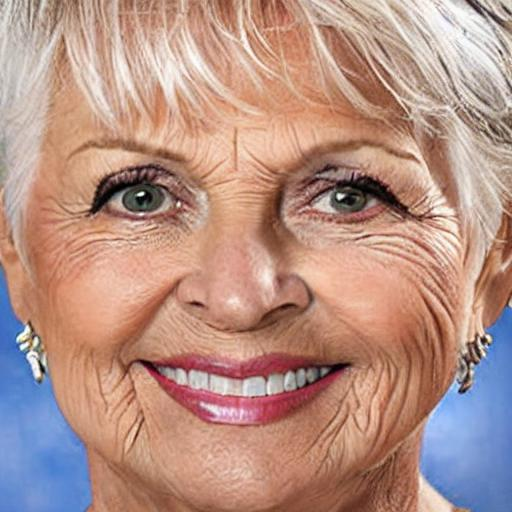

🧠 Number of faces detected: 0
🔍 Processing: outputs/finetuned/47_1_0_20170109220517890.jpg_aged_64.jpg
⚠️ InsightFace failed — trying MTCNN fallback
❌ Error on outputs/finetuned/47_1_0_20170109220517890.jpg_aged_64.jpg: OpenCV(4.11.0) /Users/xperience/GHA-Actions-OpenCV/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4086: error: (-215:Assertion failed) func != 0 in function 'resize'

Embedding (first 5 dims): ❌ Failed


In [20]:
from PIL import Image
from IPython.display import display

test_image = "outputs/finetuned/47_1_0_20170109220517890.jpg_aged_64.jpg"
embedding = get_embedding_with_deepface(test_image)
print("Final embedding:", embedding[:5] if embedding is not None else "None")



img = np.array(Image.open(test_image).convert("RGB"))
faces = face_analyzer.get(img)

display(Image.fromarray(img))
print(f"🧠 Number of faces detected: {len(faces)}")
if faces:
    print(f"→ Embedding shape: {faces[0].embedding.shape}")


embedding = get_face_embedding_with_mtcnn_fallback("outputs/finetuned/47_1_0_20170109220517890.jpg_aged_64.jpg")
print("Embedding (first 5 dims):", embedding[:5] if embedding is not None else "❌ Failed")



In [23]:
pip install facenet-pytorch


  Using cached facenet_pytorch-2.6.0-py3-none-any.whl.metadata (12 kB)
  Using cached pillow-10.2.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (9.7 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 MB 40.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.0 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: pillow 10.4.0
    Uninstalling pillow-10.4.0:
      Successfully uninstalled pillow-10.4.0
  Attempting uninstall: torch
    Found existing installation: torch 2.4.1
    Uninstalling torch-2.4.1:
      Successfully uninstalled torch-2.4.1
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.19.1
    Uninstalling torchvision-0.19.1:
      Successfully uninstalled torchvision-0.19.1

[notice] A new release of pip is available: 24.2 

In [24]:
cosine_similarity_baseline= compute_identity_similarity(
    original_folder=CLEAN_IMAGE_FOLDER,
    aged_folder=AGED_IMAGE_FOLDER_BASELINE  # or "outputs/baselines"
)
print(f"Cosine similarity for baseline: {cosine_similarity_baseline}")


85_1_2_20170110175723033.jpg
75_0_2_20170111210029130.jpg
75_0_3_20170111202756116.jpg
18_1_0_20170109214309566.jpg
14_1_0_20170109213541777.jpg
76_1_1_20170110181603235.jpg
9_0_1_20170110224349623.jpg
100_1_0_20170110183726390.jpg
100_1_2_20170110182836729.jpg
90_1_0_20170110182426286.jpg
13_0_2_20170103201143159.jpg
20_1_0_20170103201716816.jpg
85_0_1_20170111211354288.jpg
90_0_0_20170111205428761.jpg
12_0_4_20170103201824880.jpg
90_0_3_20170111210252274.jpg
1_1_1_20170109194645713.jpg
75_1_0_20170110182459565.jpg
13_0_4_20170103201708406.jpg
18_0_4_20170103201550447.jpg
56_0_0_20170111194856535.jpg
75_0_1_20170111205805911.jpg
80_0_0_20170111211508161.jpg
82_0_2_20170111210110290.jpg
75_0_1_20170111205412614.jpg
80_0_2_20170111210646563.jpg
66_0_2_20170111205753656.jpg
65_1_0_20170110160643938.jpg
63_1_4_20170110180156105.jpg
65_0_2_20170111205651706.jpg
6_0_3_20170110213739717.jpg
9_0_0_20170110215523228.jpg
80_0_1_20170111205504634.jpg
8_1_4_20170109201742209.jpg
52_0_0_2017011119

In [32]:


cosine_similarity_finetuned= compute_identity_similarity(
    original_folder=CLEAN_IMAGE_FOLDER,
    aged_folder=AGED_IMAGE_FOLDER  #  "outputs/finetuned"
)
print(f"Cosine similarity for finetuned: {cosine_similarity_finetuned}")



85_1_2_20170110175723033.jpg
75_0_2_20170111210029130.jpg
75_0_3_20170111202756116.jpg
18_1_0_20170109214309566.jpg
14_1_0_20170109213541777.jpg
76_1_1_20170110181603235.jpg
9_0_1_20170110224349623.jpg
100_1_0_20170110183726390.jpg
100_1_2_20170110182836729.jpg
90_1_0_20170110182426286.jpg
13_0_2_20170103201143159.jpg
20_1_0_20170103201716816.jpg
85_0_1_20170111211354288.jpg
90_0_0_20170111205428761.jpg
12_0_4_20170103201824880.jpg
90_0_3_20170111210252274.jpg
1_1_1_20170109194645713.jpg
75_1_0_20170110182459565.jpg
13_0_4_20170103201708406.jpg
18_0_4_20170103201550447.jpg
56_0_0_20170111194856535.jpg
75_0_1_20170111205805911.jpg
80_0_0_20170111211508161.jpg
82_0_2_20170111210110290.jpg
75_0_1_20170111205412614.jpg
80_0_2_20170111210646563.jpg
66_0_2_20170111205753656.jpg
65_1_0_20170110160643938.jpg
63_1_4_20170110180156105.jpg
65_0_2_20170111205651706.jpg
6_0_3_20170110213739717.jpg
9_0_0_20170110215523228.jpg
80_0_1_20170111205504634.jpg
8_1_4_20170109201742209.jpg
52_0_0_2017011119

  0%|          | 0/86 [00:00<?, ?it/s]

✅ DeepFace extracted embedding for: subset150/47_1_0_20170109220517890.jpg


  1%|          | 1/86 [00:00<01:08,  1.23it/s]

✅ DeepFace extracted embedding for: outputs/baselines/47_1_0_20170109220517890.jpg_aged_64.jpg
✅ DeepFace extracted embedding for: subset150/8_1_0_20170109204836782.jpg


  2%|▏         | 2/86 [00:01<01:12,  1.15it/s]

✅ DeepFace extracted embedding for: outputs/baselines/8_1_0_20170109204836782.jpg_aged_81.jpg
✅ DeepFace extracted embedding for: subset150/18_0_4_20170103201550447.jpg


  3%|▎         | 3/86 [00:02<01:08,  1.21it/s]

✅ DeepFace extracted embedding for: outputs/baselines/18_0_4_20170103201550447.jpg_aged_62.jpg
✅ DeepFace extracted embedding for: subset150/85_1_2_20170110181640900.jpg


  5%|▍         | 4/86 [00:03<01:06,  1.24it/s]

✅ DeepFace extracted embedding for: outputs/baselines/85_1_2_20170110181640900.jpg_aged_90.jpg
✅ DeepFace extracted embedding for: subset150/14_1_0_20170109213541777.jpg


  6%|▌         | 5/86 [00:04<01:05,  1.24it/s]

✅ DeepFace extracted embedding for: outputs/baselines/14_1_0_20170109213541777.jpg_aged_49.jpg
✅ DeepFace extracted embedding for: subset150/10_0_1_20170110225121326.jpg


  7%|▋         | 6/86 [00:04<01:02,  1.28it/s]

✅ DeepFace extracted embedding for: outputs/baselines/10_0_1_20170110225121326.jpg_aged_15.jpg
✅ DeepFace extracted embedding for: subset150/66_0_2_20170111205753656.jpg


  8%|▊         | 7/86 [00:05<00:59,  1.32it/s]

✅ DeepFace extracted embedding for: outputs/baselines/66_0_2_20170111205753656.jpg_aged_71.jpg
✅ DeepFace extracted embedding for: subset150/9_0_1_20170110225612237.jpg


  9%|▉         | 8/86 [00:06<00:52,  1.48it/s]

✅ DeepFace extracted embedding for: outputs/baselines/9_0_1_20170110225612237.jpg_aged_14.jpg
✅ DeepFace extracted embedding for: subset150/9_0_2_20170110215518068.jpg


 10%|█         | 9/86 [00:06<00:52,  1.47it/s]

✅ DeepFace extracted embedding for: outputs/baselines/9_0_2_20170110215518068.jpg_aged_14.jpg
✅ DeepFace extracted embedding for: subset150/80_1_4_20170110184132973.jpg


 12%|█▏        | 10/86 [00:07<00:50,  1.50it/s]

✅ DeepFace extracted embedding for: outputs/baselines/80_1_4_20170110184132973.jpg_aged_95.jpg
✅ DeepFace extracted embedding for: subset150/75_0_2_20170111210029130.jpg


 13%|█▎        | 11/86 [00:07<00:48,  1.54it/s]

✅ DeepFace extracted embedding for: outputs/baselines/75_0_2_20170111210029130.jpg_aged_80.jpg
✅ DeepFace extracted embedding for: subset150/56_0_0_20170111194856535.jpg


 14%|█▍        | 12/86 [00:08<00:48,  1.52it/s]

✅ DeepFace extracted embedding for: outputs/baselines/56_0_0_20170111194856535.jpg_aged_97.jpg
✅ DeepFace extracted embedding for: subset150/8_1_4_20170109201742209.jpg


 15%|█▌        | 13/86 [00:09<00:50,  1.45it/s]

✅ DeepFace extracted embedding for: outputs/baselines/8_1_4_20170109201742209.jpg_aged_98.jpg
✅ DeepFace extracted embedding for: subset150/88_1_1_20170110183118502.jpg


 16%|█▋        | 14/86 [00:09<00:47,  1.53it/s]

✅ DeepFace extracted embedding for: outputs/baselines/88_1_1_20170110183118502.jpg_aged_93.jpg
✅ DeepFace extracted embedding for: subset150/85_0_1_20170111211354288.jpg


 17%|█▋        | 15/86 [00:10<00:45,  1.55it/s]

✅ DeepFace extracted embedding for: outputs/baselines/85_0_1_20170111211354288.jpg_aged_90.jpg
✅ DeepFace extracted embedding for: subset150/13_1_4_20170103201542217.jpg


 19%|█▊        | 16/86 [00:11<00:49,  1.42it/s]

✅ DeepFace extracted embedding for: outputs/baselines/13_1_4_20170103201542217.jpg_aged_44.jpg
✅ DeepFace extracted embedding for: subset150/3_0_1_20170110213659314.jpg


 20%|█▉        | 17/86 [00:11<00:45,  1.51it/s]

✅ DeepFace extracted embedding for: outputs/baselines/3_0_1_20170110213659314.jpg_aged_8.jpg
✅ DeepFace extracted embedding for: subset150/40_0_0_20170104204933500.jpg


 21%|██        | 18/86 [00:12<00:46,  1.45it/s]

✅ DeepFace extracted embedding for: outputs/baselines/40_0_0_20170104204933500.jpg_aged_78.jpg
✅ DeepFace extracted embedding for: subset150/63_1_4_20170110180156105.jpg


 22%|██▏       | 19/86 [00:13<00:46,  1.43it/s]

✅ DeepFace extracted embedding for: outputs/baselines/63_1_4_20170110180156105.jpg_aged_80.jpg
✅ DeepFace extracted embedding for: subset150/30_1_1_20170110120856819.jpg


 23%|██▎       | 20/86 [00:14<00:45,  1.45it/s]

✅ DeepFace extracted embedding for: outputs/baselines/30_1_1_20170110120856819.jpg_aged_35.jpg
✅ DeepFace extracted embedding for: subset150/9_0_1_20170110224349623.jpg


 24%|██▍       | 21/86 [00:14<00:46,  1.40it/s]

✅ DeepFace extracted embedding for: outputs/baselines/9_0_1_20170110224349623.jpg_aged_14.jpg
✅ DeepFace extracted embedding for: subset150/18_1_0_20170109214309566.jpg


 26%|██▌       | 22/86 [00:15<00:45,  1.42it/s]

✅ DeepFace extracted embedding for: outputs/baselines/18_1_0_20170109214309566.jpg_aged_32.jpg
✅ DeepFace extracted embedding for: subset150/70_0_0_20170111210749134.jpg


 27%|██▋       | 23/86 [00:16<00:43,  1.44it/s]

✅ DeepFace extracted embedding for: outputs/baselines/70_0_0_20170111210749134.jpg_aged_94.jpg
✅ DeepFace extracted embedding for: subset150/1_1_4_20170109194502921.jpg


 28%|██▊       | 24/86 [00:17<00:44,  1.41it/s]

✅ DeepFace extracted embedding for: outputs/baselines/1_1_4_20170109194502921.jpg_aged_80.jpg
✅ DeepFace extracted embedding for: subset150/65_0_0_20170111203557764.jpg


 29%|██▉       | 25/86 [00:17<00:42,  1.43it/s]

✅ DeepFace extracted embedding for: outputs/baselines/65_0_0_20170111203557764.jpg_aged_76.jpg
✅ DeepFace extracted embedding for: subset150/15_1_4_20170103201247846.jpg


 30%|███       | 26/86 [00:18<00:44,  1.35it/s]

✅ DeepFace extracted embedding for: outputs/baselines/15_1_4_20170103201247846.jpg_aged_52.jpg
✅ DeepFace extracted embedding for: subset150/56_1_0_20170110173815028.jpg


 31%|███▏      | 27/86 [00:19<00:49,  1.19it/s]

✅ DeepFace extracted embedding for: outputs/baselines/56_1_0_20170110173815028.jpg_aged_76.jpg
✅ DeepFace extracted embedding for: subset150/1_1_1_20170109194645713.jpg


 33%|███▎      | 28/86 [00:20<00:45,  1.28it/s]

✅ DeepFace extracted embedding for: outputs/baselines/1_1_1_20170109194645713.jpg_aged_6.jpg
✅ DeepFace extracted embedding for: subset150/90_0_2_20170110183643228.jpg


 34%|███▎      | 29/86 [00:20<00:42,  1.33it/s]

✅ DeepFace extracted embedding for: outputs/baselines/90_0_2_20170110183643228.jpg_aged_95.jpg
✅ DeepFace extracted embedding for: subset150/80_0_1_20170111205504634.jpg


 35%|███▍      | 30/86 [00:22<00:48,  1.17it/s]

✅ DeepFace extracted embedding for: outputs/baselines/80_0_1_20170111205504634.jpg_aged_85.jpg
✅ DeepFace extracted embedding for: subset150/45_1_0_20170109221130179.jpg


 36%|███▌      | 31/86 [00:22<00:44,  1.24it/s]

✅ DeepFace extracted embedding for: outputs/baselines/45_1_0_20170109221130179.jpg_aged_92.jpg
✅ DeepFace extracted embedding for: subset150/75_0_1_20170111210049339.jpg


 37%|███▋      | 32/86 [00:23<00:39,  1.36it/s]

✅ DeepFace extracted embedding for: outputs/baselines/75_0_1_20170111210049339.jpg_aged_80.jpg
✅ DeepFace extracted embedding for: subset150/9_0_0_20170110215523228.jpg


 38%|███▊      | 33/86 [00:23<00:37,  1.41it/s]

✅ DeepFace extracted embedding for: outputs/baselines/9_0_0_20170110215523228.jpg_aged_70.jpg
✅ DeepFace extracted embedding for: subset150/64_1_0_20170110160643892.jpg


 40%|███▉      | 34/86 [00:24<00:35,  1.48it/s]

✅ DeepFace extracted embedding for: outputs/baselines/64_1_0_20170110160643892.jpg_aged_80.jpg
✅ DeepFace extracted embedding for: subset150/90_1_2_20170111221639268.jpg


 41%|████      | 35/86 [00:25<00:44,  1.15it/s]

✅ DeepFace extracted embedding for: outputs/baselines/90_1_2_20170111221639268.jpg_aged_95.jpg
✅ DeepFace extracted embedding for: subset150/75_1_0_20170110182459565.jpg


 42%|████▏     | 36/86 [00:26<00:41,  1.20it/s]

✅ DeepFace extracted embedding for: outputs/baselines/75_1_0_20170110182459565.jpg_aged_97.jpg
✅ DeepFace extracted embedding for: subset150/90_0_2_20170111210212331.jpg


 43%|████▎     | 37/86 [00:27<00:40,  1.21it/s]

✅ DeepFace extracted embedding for: outputs/baselines/90_0_2_20170111210212331.jpg_aged_95.jpg
✅ DeepFace extracted embedding for: subset150/17_0_0_20170110231535087.jpg


 44%|████▍     | 38/86 [00:28<00:39,  1.22it/s]

✅ DeepFace extracted embedding for: outputs/baselines/17_0_0_20170110231535087.jpg_aged_92.jpg
✅ DeepFace extracted embedding for: subset150/20_1_0_20170109213411083.jpg


 45%|████▌     | 39/86 [00:29<00:38,  1.21it/s]

✅ DeepFace extracted embedding for: outputs/baselines/20_1_0_20170109213411083.jpg_aged_45.jpg
✅ DeepFace extracted embedding for: subset150/15_1_4_20170103201247846.jpg


 47%|████▋     | 40/86 [00:29<00:37,  1.23it/s]

✅ DeepFace extracted embedding for: outputs/baselines/15_1_4_20170103201247846.jpg_aged_94.jpg
✅ DeepFace extracted embedding for: subset150/1_0_1_20170110213111809.jpg


 48%|████▊     | 41/86 [00:30<00:40,  1.11it/s]

✅ DeepFace extracted embedding for: outputs/baselines/1_0_1_20170110213111809.jpg_aged_6.jpg
✅ DeepFace extracted embedding for: subset150/12_1_2_20170109203838187.jpg


 49%|████▉     | 42/86 [00:31<00:37,  1.17it/s]

✅ DeepFace extracted embedding for: outputs/baselines/12_1_2_20170109203838187.jpg_aged_17.jpg
✅ DeepFace extracted embedding for: subset150/75_0_1_20170111210115928.jpg


 50%|█████     | 43/86 [00:32<00:32,  1.31it/s]

✅ DeepFace extracted embedding for: outputs/baselines/75_0_1_20170111210115928.jpg_aged_80.jpg
✅ DeepFace extracted embedding for: subset150/8_1_0_20170109202339392.jpg


 51%|█████     | 44/86 [00:33<00:32,  1.31it/s]

✅ DeepFace extracted embedding for: outputs/baselines/8_1_0_20170109202339392.jpg_aged_58.jpg
✅ DeepFace extracted embedding for: subset150/77_1_0_20170110160644117.jpg


 52%|█████▏    | 45/86 [00:33<00:32,  1.25it/s]

✅ DeepFace extracted embedding for: outputs/baselines/77_1_0_20170110160644117.jpg_aged_100.jpg
✅ DeepFace extracted embedding for: subset150/90_0_2_20170111210301275.jpg


 53%|█████▎    | 46/86 [00:34<00:29,  1.36it/s]

✅ DeepFace extracted embedding for: outputs/baselines/90_0_2_20170111210301275.jpg_aged_95.jpg
✅ DeepFace extracted embedding for: subset150/60_1_1_20170110120140583.jpg


 55%|█████▍    | 47/86 [00:35<00:26,  1.49it/s]

✅ DeepFace extracted embedding for: outputs/baselines/60_1_1_20170110120140583.jpg_aged_65.jpg
✅ DeepFace extracted embedding for: subset150/82_0_2_20170111210110290.jpg


 56%|█████▌    | 48/86 [00:35<00:24,  1.56it/s]

✅ DeepFace extracted embedding for: outputs/baselines/82_0_2_20170111210110290.jpg_aged_87.jpg
✅ DeepFace extracted embedding for: subset150/80_0_1_20170111205416943.jpg


 57%|█████▋    | 49/86 [00:36<00:22,  1.66it/s]

✅ DeepFace extracted embedding for: outputs/baselines/80_0_1_20170111205416943.jpg_aged_85.jpg
✅ DeepFace extracted embedding for: subset150/13_0_2_20170103201143159.jpg


 58%|█████▊    | 50/86 [00:36<00:20,  1.71it/s]

✅ DeepFace extracted embedding for: outputs/baselines/13_0_2_20170103201143159.jpg_aged_18.jpg
✅ DeepFace extracted embedding for: subset150/65_0_0_20170111203557764.jpg


 59%|█████▉    | 51/86 [00:37<00:21,  1.66it/s]

✅ DeepFace extracted embedding for: outputs/baselines/65_0_0_20170111203557764.jpg_aged_83.jpg
✅ DeepFace extracted embedding for: subset150/59_1_0_20170110141359968.jpg


 60%|██████    | 52/86 [00:37<00:20,  1.62it/s]

✅ DeepFace extracted embedding for: outputs/baselines/59_1_0_20170110141359968.jpg_aged_76.jpg
✅ DeepFace extracted embedding for: subset150/3_1_0_20170109192939414.jpg


 62%|██████▏   | 53/86 [00:38<00:20,  1.57it/s]

✅ DeepFace extracted embedding for: outputs/baselines/3_1_0_20170109192939414.jpg_aged_94.jpg
✅ DeepFace extracted embedding for: subset150/18_1_0_20170109214700491.jpg


 63%|██████▎   | 54/86 [00:39<00:19,  1.62it/s]

✅ DeepFace extracted embedding for: outputs/baselines/18_1_0_20170109214700491.jpg_aged_42.jpg
✅ DeepFace extracted embedding for: subset150/45_0_1_20170111200809203.jpg


 64%|██████▍   | 55/86 [00:39<00:20,  1.53it/s]

✅ DeepFace extracted embedding for: outputs/baselines/45_0_1_20170111200809203.jpg_aged_50.jpg
✅ DeepFace extracted embedding for: subset150/69_1_2_20170111210824053.jpg


 65%|██████▌   | 56/86 [00:40<00:18,  1.59it/s]

✅ DeepFace extracted embedding for: outputs/baselines/69_1_2_20170111210824053.jpg_aged_74.jpg


 66%|██████▋   | 57/86 [00:40<00:17,  1.71it/s]

✅ DeepFace extracted embedding for: subset150/52_0_0_20170111195709447.jpg
✅ DeepFace extracted embedding for: outputs/baselines/52_0_0_20170111195709447.jpg_aged_73.jpg
✅ DeepFace extracted embedding for: subset150/24_1_2_20170109213251114.jpg


 67%|██████▋   | 58/86 [00:41<00:16,  1.65it/s]

✅ DeepFace extracted embedding for: outputs/baselines/24_1_2_20170109213251114.jpg_aged_29.jpg
✅ DeepFace extracted embedding for: subset150/71_1_0_20170110160644048.jpg


 69%|██████▊   | 59/86 [00:42<00:17,  1.57it/s]

✅ DeepFace extracted embedding for: outputs/baselines/71_1_0_20170110160644048.jpg_aged_86.jpg
✅ DeepFace extracted embedding for: subset150/61_1_0_20170110160643735.jpg


 70%|██████▉   | 60/86 [00:42<00:16,  1.59it/s]

✅ DeepFace extracted embedding for: outputs/baselines/61_1_0_20170110160643735.jpg_aged_79.jpg
✅ DeepFace extracted embedding for: subset150/75_0_1_20170111205412614.jpg


 71%|███████   | 61/86 [00:43<00:14,  1.69it/s]

✅ DeepFace extracted embedding for: outputs/baselines/75_0_1_20170111205412614.jpg_aged_80.jpg
✅ DeepFace extracted embedding for: subset150/75_0_1_20170111205805911.jpg


 72%|███████▏  | 62/86 [00:44<00:14,  1.66it/s]

✅ DeepFace extracted embedding for: outputs/baselines/75_0_1_20170111205805911.jpg_aged_80.jpg
✅ DeepFace extracted embedding for: subset150/8_1_2_20170109205424712.jpg


 73%|███████▎  | 63/86 [00:44<00:14,  1.62it/s]

✅ DeepFace extracted embedding for: outputs/baselines/8_1_2_20170109205424712.jpg_aged_13.jpg
✅ DeepFace extracted embedding for: subset150/12_0_4_20170103201824880.jpg


 74%|███████▍  | 64/86 [00:45<00:13,  1.59it/s]

✅ DeepFace extracted embedding for: outputs/baselines/12_0_4_20170103201824880.jpg_aged_71.jpg
✅ DeepFace extracted embedding for: subset150/23_0_0_20170111181750321.jpg


 76%|███████▌  | 65/86 [00:46<00:13,  1.53it/s]

✅ DeepFace extracted embedding for: outputs/baselines/23_0_0_20170111181750321.jpg_aged_51.jpg
✅ DeepFace extracted embedding for: subset150/80_0_2_20170111210646563.jpg


 77%|███████▋  | 66/86 [00:46<00:12,  1.55it/s]

✅ DeepFace extracted embedding for: outputs/baselines/80_0_2_20170111210646563.jpg_aged_85.jpg
✅ DeepFace extracted embedding for: subset150/76_1_1_20170110181603235.jpg


 78%|███████▊  | 67/86 [00:47<00:12,  1.55it/s]

✅ DeepFace extracted embedding for: outputs/baselines/76_1_1_20170110181603235.jpg_aged_81.jpg
✅ DeepFace extracted embedding for: subset150/1_1_4_20170109194502921.jpg


 79%|███████▉  | 68/86 [00:47<00:10,  1.68it/s]

✅ DeepFace extracted embedding for: outputs/baselines/1_1_4_20170109194502921.jpg_aged_29.jpg
✅ DeepFace extracted embedding for: subset150/65_0_2_20170111205651706.jpg


 80%|████████  | 69/86 [00:48<00:09,  1.73it/s]

✅ DeepFace extracted embedding for: outputs/baselines/65_0_2_20170111205651706.jpg_aged_70.jpg
✅ DeepFace extracted embedding for: subset150/58_0_1_20170111210843429.jpg


 81%|████████▏ | 70/86 [00:48<00:09,  1.72it/s]

✅ DeepFace extracted embedding for: outputs/baselines/58_0_1_20170111210843429.jpg_aged_63.jpg
✅ DeepFace extracted embedding for: subset150/76_0_0_20170111210148707.jpg


 83%|████████▎ | 71/86 [00:49<00:08,  1.78it/s]

✅ DeepFace extracted embedding for: outputs/baselines/76_0_0_20170111210148707.jpg_aged_99.jpg
✅ DeepFace extracted embedding for: subset150/13_0_4_20170103201708406.jpg


 84%|████████▎ | 72/86 [00:50<00:08,  1.57it/s]

✅ DeepFace extracted embedding for: outputs/baselines/13_0_4_20170103201708406.jpg_aged_57.jpg
✅ DeepFace extracted embedding for: subset150/12_0_4_20170103201824880.jpg


 85%|████████▍ | 73/86 [00:50<00:08,  1.54it/s]

✅ DeepFace extracted embedding for: outputs/baselines/12_0_4_20170103201824880.jpg_aged_29.jpg
✅ DeepFace extracted embedding for: subset150/10_1_1_20170109203520178.jpg


 86%|████████▌ | 74/86 [00:51<00:08,  1.47it/s]

✅ DeepFace extracted embedding for: outputs/baselines/10_1_1_20170109203520178.jpg_aged_15.jpg
✅ DeepFace extracted embedding for: subset150/85_1_2_20170110175723033.jpg


 87%|████████▋ | 75/86 [00:52<00:07,  1.48it/s]

✅ DeepFace extracted embedding for: outputs/baselines/85_1_2_20170110175723033.jpg_aged_90.jpg
✅ DeepFace extracted embedding for: subset150/8_1_4_20170109201742209.jpg


 88%|████████▊ | 76/86 [00:53<00:07,  1.42it/s]

✅ DeepFace extracted embedding for: outputs/baselines/8_1_4_20170109201742209.jpg_aged_95.jpg
✅ DeepFace extracted embedding for: subset150/13_0_4_20170103201708406.jpg


 90%|████████▉ | 77/86 [00:53<00:05,  1.57it/s]

✅ DeepFace extracted embedding for: outputs/baselines/13_0_4_20170103201708406.jpg_aged_44.jpg
✅ DeepFace extracted embedding for: subset150/76_1_2_20170110182935621.jpg


 91%|█████████ | 78/86 [00:54<00:04,  1.61it/s]

✅ DeepFace extracted embedding for: outputs/baselines/76_1_2_20170110182935621.jpg_aged_81.jpg
✅ DeepFace extracted embedding for: subset150/53_1_0_20170110160643204.jpg


 92%|█████████▏| 79/86 [00:54<00:04,  1.62it/s]

✅ DeepFace extracted embedding for: outputs/baselines/53_1_0_20170110160643204.jpg_aged_89.jpg
✅ DeepFace extracted embedding for: subset150/4_0_0_20170110205422145.jpg


 93%|█████████▎| 80/86 [00:55<00:03,  1.77it/s]

✅ DeepFace extracted embedding for: outputs/baselines/4_0_0_20170110205422145.jpg_aged_95.jpg
✅ DeepFace extracted embedding for: subset150/65_1_0_20170110132512700.jpg


 94%|█████████▍| 81/86 [00:55<00:02,  1.72it/s]

✅ DeepFace extracted embedding for: outputs/baselines/65_1_0_20170110132512700.jpg_aged_95.jpg
✅ DeepFace extracted embedding for: subset150/65_1_0_20170110132512700.jpg


 95%|█████████▌| 82/86 [00:56<00:02,  1.64it/s]

✅ DeepFace extracted embedding for: outputs/baselines/65_1_0_20170110132512700.jpg_aged_97.jpg
✅ DeepFace extracted embedding for: subset150/86_0_2_20170111210346308.jpg


 97%|█████████▋| 83/86 [00:57<00:01,  1.63it/s]

✅ DeepFace extracted embedding for: outputs/baselines/86_0_2_20170111210346308.jpg_aged_91.jpg
✅ DeepFace extracted embedding for: subset150/14_1_0_20170109212926958.jpg


 98%|█████████▊| 84/86 [00:57<00:01,  1.56it/s]

✅ DeepFace extracted embedding for: outputs/baselines/14_1_0_20170109212926958.jpg_aged_63.jpg
✅ DeepFace extracted embedding for: subset150/20_1_0_20170103201716816.jpg


 99%|█████████▉| 85/86 [00:58<00:00,  1.63it/s]

✅ DeepFace extracted embedding for: outputs/baselines/20_1_0_20170103201716816.jpg_aged_72.jpg
✅ DeepFace extracted embedding for: subset150/65_1_0_20170110160643938.jpg


100%|██████████| 86/86 [00:59<00:00,  1.45it/s]


✅ DeepFace extracted embedding for: outputs/baselines/65_1_0_20170110160643938.jpg_aged_95.jpg


  0%|          | 0/84 [00:00<?, ?it/s]

✅ DeepFace extracted embedding for: subset150/47_1_0_20170109220517890.jpg


  1%|          | 1/84 [00:00<01:02,  1.33it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/47_1_0_20170109220517890.jpg_aged_64.jpg
✅ DeepFace extracted embedding for: subset150/8_1_0_20170109204836782.jpg


  2%|▏         | 2/84 [00:01<00:59,  1.39it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/8_1_0_20170109204836782.jpg_aged_81.jpg
✅ DeepFace extracted embedding for: subset150/18_0_4_20170103201550447.jpg


  4%|▎         | 3/84 [00:02<00:56,  1.44it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/18_0_4_20170103201550447.jpg_aged_62.jpg
✅ DeepFace extracted embedding for: subset150/85_1_2_20170110181640900.jpg


  5%|▍         | 4/84 [00:02<00:54,  1.47it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/85_1_2_20170110181640900.jpg_aged_90.jpg
✅ DeepFace extracted embedding for: subset150/14_1_0_20170109213541777.jpg


  6%|▌         | 5/84 [00:03<00:48,  1.62it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/14_1_0_20170109213541777.jpg_aged_49.jpg
✅ DeepFace extracted embedding for: subset150/10_0_1_20170110225121326.jpg


  7%|▋         | 6/84 [00:03<00:47,  1.64it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/10_0_1_20170110225121326.jpg_aged_15.jpg
✅ DeepFace extracted embedding for: subset150/66_0_2_20170111205753656.jpg


  8%|▊         | 7/84 [00:04<00:50,  1.52it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/66_0_2_20170111205753656.jpg_aged_71.jpg
✅ DeepFace extracted embedding for: subset150/9_0_1_20170110225612237.jpg


 10%|▉         | 8/84 [00:05<00:47,  1.60it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/9_0_1_20170110225612237.jpg_aged_14.jpg
✅ DeepFace extracted embedding for: subset150/9_0_2_20170110215518068.jpg


 11%|█         | 9/84 [00:06<00:52,  1.42it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/9_0_2_20170110215518068.jpg_aged_14.jpg
✅ DeepFace extracted embedding for: subset150/80_1_4_20170110184132973.jpg


 12%|█▏        | 10/84 [00:06<00:51,  1.43it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/80_1_4_20170110184132973.jpg_aged_95.jpg
✅ DeepFace extracted embedding for: subset150/75_0_2_20170111210029130.jpg


 13%|█▎        | 11/84 [00:07<00:52,  1.40it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/75_0_2_20170111210029130.jpg_aged_80.jpg
✅ DeepFace extracted embedding for: subset150/56_0_0_20170111194856535.jpg


 14%|█▍        | 12/84 [00:08<00:50,  1.42it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/56_0_0_20170111194856535.jpg_aged_97.jpg
✅ DeepFace extracted embedding for: subset150/8_1_4_20170109201742209.jpg


 15%|█▌        | 13/84 [00:08<00:49,  1.42it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/8_1_4_20170109201742209.jpg_aged_98.jpg
✅ DeepFace extracted embedding for: subset150/88_1_1_20170110183118502.jpg


 17%|█▋        | 14/84 [00:09<00:47,  1.48it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/88_1_1_20170110183118502.jpg_aged_93.jpg
✅ DeepFace extracted embedding for: subset150/85_0_1_20170111211354288.jpg


 18%|█▊        | 15/84 [00:10<00:45,  1.51it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/85_0_1_20170111211354288.jpg_aged_90.jpg
✅ DeepFace extracted embedding for: subset150/13_1_4_20170103201542217.jpg


 19%|█▉        | 16/84 [00:10<00:46,  1.47it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/13_1_4_20170103201542217.jpg_aged_44.jpg
✅ DeepFace extracted embedding for: subset150/3_0_1_20170110213659314.jpg


 20%|██        | 17/84 [00:11<00:41,  1.61it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/3_0_1_20170110213659314.jpg_aged_8.jpg
✅ DeepFace extracted embedding for: subset150/40_0_0_20170104204933500.jpg


 21%|██▏       | 18/84 [00:12<00:43,  1.51it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/40_0_0_20170104204933500.jpg_aged_78.jpg
✅ DeepFace extracted embedding for: subset150/63_1_4_20170110180156105.jpg


 23%|██▎       | 19/84 [00:12<00:42,  1.54it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/63_1_4_20170110180156105.jpg_aged_80.jpg
✅ DeepFace extracted embedding for: subset150/30_1_1_20170110120856819.jpg


 24%|██▍       | 20/84 [00:13<00:40,  1.57it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/30_1_1_20170110120856819.jpg_aged_35.jpg
✅ DeepFace extracted embedding for: subset150/9_0_1_20170110224349623.jpg


 25%|██▌       | 21/84 [00:14<00:46,  1.36it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/9_0_1_20170110224349623.jpg_aged_14.jpg
✅ DeepFace extracted embedding for: subset150/18_1_0_20170109214309566.jpg


 26%|██▌       | 22/84 [00:15<00:47,  1.31it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/18_1_0_20170109214309566.jpg_aged_32.jpg
✅ DeepFace extracted embedding for: subset150/70_0_0_20170111210749134.jpg


 27%|██▋       | 23/84 [00:15<00:46,  1.32it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/70_0_0_20170111210749134.jpg_aged_94.jpg
✅ DeepFace extracted embedding for: subset150/1_1_4_20170109194502921.jpg


 29%|██▊       | 24/84 [00:16<00:45,  1.31it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/1_1_4_20170109194502921.jpg_aged_80.jpg
✅ DeepFace extracted embedding for: subset150/65_0_0_20170111203557764.jpg


 30%|██▉       | 25/84 [00:17<00:44,  1.34it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/65_0_0_20170111203557764.jpg_aged_76.jpg
✅ DeepFace extracted embedding for: subset150/15_1_4_20170103201247846.jpg


 31%|███       | 26/84 [00:18<00:44,  1.31it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/15_1_4_20170103201247846.jpg_aged_52.jpg
✅ DeepFace extracted embedding for: subset150/56_1_0_20170110173815028.jpg


 32%|███▏      | 27/84 [00:18<00:40,  1.40it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/56_1_0_20170110173815028.jpg_aged_76.jpg
✅ DeepFace extracted embedding for: subset150/1_1_1_20170109194645713.jpg


 33%|███▎      | 28/84 [00:19<00:37,  1.50it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/1_1_1_20170109194645713.jpg_aged_6.jpg
✅ DeepFace extracted embedding for: subset150/90_0_2_20170110183643228.jpg


 35%|███▍      | 29/84 [00:20<00:38,  1.43it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/90_0_2_20170110183643228.jpg_aged_95.jpg
✅ DeepFace extracted embedding for: subset150/80_0_1_20170111205504634.jpg


 36%|███▌      | 30/84 [00:20<00:40,  1.33it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/80_0_1_20170111205504634.jpg_aged_85.jpg
✅ DeepFace extracted embedding for: subset150/45_1_0_20170109221130179.jpg


 37%|███▋      | 31/84 [00:21<00:37,  1.40it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/45_1_0_20170109221130179.jpg_aged_92.jpg
✅ DeepFace extracted embedding for: subset150/75_0_1_20170111210049339.jpg


 38%|███▊      | 32/84 [00:22<00:35,  1.45it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/75_0_1_20170111210049339.jpg_aged_80.jpg
✅ DeepFace extracted embedding for: subset150/9_0_0_20170110215523228.jpg


 39%|███▉      | 33/84 [00:22<00:36,  1.39it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/9_0_0_20170110215523228.jpg_aged_70.jpg
✅ DeepFace extracted embedding for: subset150/64_1_0_20170110160643892.jpg


 40%|████      | 34/84 [00:23<00:34,  1.45it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/64_1_0_20170110160643892.jpg_aged_80.jpg
✅ DeepFace extracted embedding for: subset150/90_1_2_20170111221639268.jpg


 42%|████▏     | 35/84 [00:24<00:35,  1.36it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/90_1_2_20170111221639268.jpg_aged_95.jpg
✅ DeepFace extracted embedding for: subset150/75_1_0_20170110182459565.jpg


 43%|████▎     | 36/84 [00:25<00:32,  1.47it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/75_1_0_20170110182459565.jpg_aged_97.jpg
✅ DeepFace extracted embedding for: subset150/90_0_2_20170111210212331.jpg


 44%|████▍     | 37/84 [00:25<00:30,  1.53it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/90_0_2_20170111210212331.jpg_aged_95.jpg
✅ DeepFace extracted embedding for: subset150/17_0_0_20170110231535087.jpg


 45%|████▌     | 38/84 [00:26<00:29,  1.58it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/17_0_0_20170110231535087.jpg_aged_92.jpg
✅ DeepFace extracted embedding for: subset150/20_1_0_20170109213411083.jpg


 46%|████▋     | 39/84 [00:26<00:29,  1.52it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/20_1_0_20170109213411083.jpg_aged_45.jpg
✅ DeepFace extracted embedding for: subset150/15_1_4_20170103201247846.jpg


 48%|████▊     | 40/84 [00:27<00:29,  1.47it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/15_1_4_20170103201247846.jpg_aged_94.jpg
✅ DeepFace extracted embedding for: subset150/1_0_1_20170110213111809.jpg


 49%|████▉     | 41/84 [00:28<00:28,  1.51it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/1_0_1_20170110213111809.jpg_aged_6.jpg
✅ DeepFace extracted embedding for: subset150/12_1_2_20170109203838187.jpg


 50%|█████     | 42/84 [00:28<00:28,  1.48it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/12_1_2_20170109203838187.jpg_aged_17.jpg
✅ DeepFace extracted embedding for: subset150/75_0_1_20170111210115928.jpg


 51%|█████     | 43/84 [00:29<00:26,  1.53it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/75_0_1_20170111210115928.jpg_aged_80.jpg
✅ DeepFace extracted embedding for: subset150/8_1_0_20170109202339392.jpg


 52%|█████▏    | 44/84 [00:30<00:26,  1.51it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/8_1_0_20170109202339392.jpg_aged_58.jpg
✅ DeepFace extracted embedding for: subset150/77_1_0_20170110160644117.jpg


 54%|█████▎    | 45/84 [00:31<00:27,  1.44it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/77_1_0_20170110160644117.jpg_aged_100.jpg
✅ DeepFace extracted embedding for: subset150/90_0_2_20170111210301275.jpg


 55%|█████▍    | 46/84 [00:31<00:25,  1.49it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/90_0_2_20170111210301275.jpg_aged_95.jpg
✅ DeepFace extracted embedding for: subset150/60_1_1_20170110120140583.jpg


 56%|█████▌    | 47/84 [00:32<00:23,  1.54it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/60_1_1_20170110120140583.jpg_aged_65.jpg
✅ DeepFace extracted embedding for: subset150/82_0_2_20170111210110290.jpg


 57%|█████▋    | 48/84 [00:32<00:23,  1.52it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/82_0_2_20170111210110290.jpg_aged_87.jpg
✅ DeepFace extracted embedding for: subset150/80_0_1_20170111205416943.jpg


 58%|█████▊    | 49/84 [00:33<00:24,  1.46it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/80_0_1_20170111205416943.jpg_aged_85.jpg
✅ DeepFace extracted embedding for: subset150/13_0_2_20170103201143159.jpg


 60%|█████▉    | 50/84 [00:34<00:25,  1.33it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/13_0_2_20170103201143159.jpg_aged_18.jpg
✅ DeepFace extracted embedding for: subset150/65_0_0_20170111203557764.jpg


 61%|██████    | 51/84 [00:35<00:25,  1.32it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/65_0_0_20170111203557764.jpg_aged_83.jpg
✅ DeepFace extracted embedding for: subset150/59_1_0_20170110141359968.jpg


 62%|██████▏   | 52/84 [00:36<00:24,  1.32it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/59_1_0_20170110141359968.jpg_aged_76.jpg
✅ DeepFace extracted embedding for: subset150/3_1_0_20170109192939414.jpg


 63%|██████▎   | 53/84 [00:37<00:26,  1.17it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/3_1_0_20170109192939414.jpg_aged_94.jpg
✅ DeepFace extracted embedding for: subset150/18_1_0_20170109214700491.jpg


 64%|██████▍   | 54/84 [00:37<00:24,  1.21it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/18_1_0_20170109214700491.jpg_aged_42.jpg
✅ DeepFace extracted embedding for: subset150/45_0_1_20170111200809203.jpg


 65%|██████▌   | 55/84 [00:38<00:22,  1.29it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/45_0_1_20170111200809203.jpg_aged_50.jpg
✅ DeepFace extracted embedding for: subset150/69_1_2_20170111210824053.jpg


 67%|██████▋   | 56/84 [00:39<00:21,  1.33it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/69_1_2_20170111210824053.jpg_aged_74.jpg
✅ DeepFace extracted embedding for: subset150/52_0_0_20170111195709447.jpg


 68%|██████▊   | 57/84 [00:39<00:19,  1.36it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/52_0_0_20170111195709447.jpg_aged_73.jpg
✅ DeepFace extracted embedding for: subset150/24_1_2_20170109213251114.jpg


 69%|██████▉   | 58/84 [00:40<00:19,  1.30it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/24_1_2_20170109213251114.jpg_aged_29.jpg
✅ DeepFace extracted embedding for: subset150/71_1_0_20170110160644048.jpg


 70%|███████   | 59/84 [00:41<00:19,  1.28it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/71_1_0_20170110160644048.jpg_aged_86.jpg
✅ DeepFace extracted embedding for: subset150/61_1_0_20170110160643735.jpg


 71%|███████▏  | 60/84 [00:42<00:18,  1.33it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/61_1_0_20170110160643735.jpg_aged_79.jpg
✅ DeepFace extracted embedding for: subset150/75_0_1_20170111205412614.jpg


 73%|███████▎  | 61/84 [00:42<00:15,  1.44it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/75_0_1_20170111205412614.jpg_aged_80.jpg
✅ DeepFace extracted embedding for: subset150/75_0_1_20170111205805911.jpg


 74%|███████▍  | 62/84 [00:43<00:17,  1.29it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/75_0_1_20170111205805911.jpg_aged_80.jpg
✅ DeepFace extracted embedding for: subset150/8_1_2_20170109205424712.jpg


 75%|███████▌  | 63/84 [00:44<00:16,  1.28it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/8_1_2_20170109205424712.jpg_aged_13.jpg
✅ DeepFace extracted embedding for: subset150/23_0_0_20170111181750321.jpg


 76%|███████▌  | 64/84 [00:45<00:15,  1.26it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/23_0_0_20170111181750321.jpg_aged_51.jpg
✅ DeepFace extracted embedding for: subset150/80_0_2_20170111210646563.jpg


 77%|███████▋  | 65/84 [00:46<00:14,  1.35it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/80_0_2_20170111210646563.jpg_aged_85.jpg
✅ DeepFace extracted embedding for: subset150/76_1_1_20170110181603235.jpg


 79%|███████▊  | 66/84 [00:46<00:13,  1.37it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/76_1_1_20170110181603235.jpg_aged_81.jpg
✅ DeepFace extracted embedding for: subset150/1_1_4_20170109194502921.jpg


 80%|███████▉  | 67/84 [00:47<00:11,  1.53it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/1_1_4_20170109194502921.jpg_aged_29.jpg
✅ DeepFace extracted embedding for: subset150/65_0_2_20170111205651706.jpg


 81%|████████  | 68/84 [00:47<00:10,  1.52it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/65_0_2_20170111205651706.jpg_aged_70.jpg
✅ DeepFace extracted embedding for: subset150/58_0_1_20170111210843429.jpg


 82%|████████▏ | 69/84 [00:48<00:09,  1.54it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/58_0_1_20170111210843429.jpg_aged_63.jpg
✅ DeepFace extracted embedding for: subset150/76_0_0_20170111210148707.jpg


 83%|████████▎ | 70/84 [00:49<00:08,  1.57it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/76_0_0_20170111210148707.jpg_aged_99.jpg
✅ DeepFace extracted embedding for: subset150/13_0_4_20170103201708406.jpg


 85%|████████▍ | 71/84 [00:49<00:07,  1.68it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/13_0_4_20170103201708406.jpg_aged_57.jpg
✅ DeepFace extracted embedding for: subset150/12_0_4_20170103201824880.jpg


 86%|████████▌ | 72/84 [00:50<00:07,  1.54it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/12_0_4_20170103201824880.jpg_aged_29.jpg
✅ DeepFace extracted embedding for: subset150/10_1_1_20170109203520178.jpg


 87%|████████▋ | 73/84 [00:51<00:06,  1.61it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/10_1_1_20170109203520178.jpg_aged_15.jpg
✅ DeepFace extracted embedding for: subset150/85_1_2_20170110175723033.jpg


 88%|████████▊ | 74/84 [00:51<00:06,  1.61it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/85_1_2_20170110175723033.jpg_aged_90.jpg
✅ DeepFace extracted embedding for: subset150/8_1_4_20170109201742209.jpg


 89%|████████▉ | 75/84 [00:52<00:05,  1.65it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/8_1_4_20170109201742209.jpg_aged_95.jpg
✅ DeepFace extracted embedding for: subset150/13_0_4_20170103201708406.jpg


 90%|█████████ | 76/84 [00:52<00:04,  1.74it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/13_0_4_20170103201708406.jpg_aged_44.jpg
✅ DeepFace extracted embedding for: subset150/76_1_2_20170110182935621.jpg


 92%|█████████▏| 77/84 [00:53<00:04,  1.73it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/76_1_2_20170110182935621.jpg_aged_81.jpg
✅ DeepFace extracted embedding for: subset150/53_1_0_20170110160643204.jpg


 93%|█████████▎| 78/84 [00:53<00:03,  1.71it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/53_1_0_20170110160643204.jpg_aged_89.jpg
✅ DeepFace extracted embedding for: subset150/4_0_0_20170110205422145.jpg


 94%|█████████▍| 79/84 [00:54<00:02,  1.77it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/4_0_0_20170110205422145.jpg_aged_95.jpg
✅ DeepFace extracted embedding for: subset150/65_1_0_20170110132512700.jpg


 95%|█████████▌| 80/84 [00:54<00:02,  1.78it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/65_1_0_20170110132512700.jpg_aged_97.jpg
✅ DeepFace extracted embedding for: subset150/86_0_2_20170111210346308.jpg


 96%|█████████▋| 81/84 [00:55<00:01,  1.63it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/86_0_2_20170111210346308.jpg_aged_91.jpg
✅ DeepFace extracted embedding for: subset150/14_1_0_20170109212926958.jpg


 98%|█████████▊| 82/84 [00:56<00:01,  1.62it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/14_1_0_20170109212926958.jpg_aged_63.jpg
✅ DeepFace extracted embedding for: subset150/20_1_0_20170103201716816.jpg


 99%|█████████▉| 83/84 [00:56<00:00,  1.59it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/20_1_0_20170103201716816.jpg_aged_72.jpg
✅ DeepFace extracted embedding for: subset150/65_1_0_20170110160643938.jpg


100%|██████████| 84/84 [00:57<00:00,  1.45it/s]

✅ DeepFace extracted embedding for: outputs/finetuned/65_1_0_20170110160643938.jpg_aged_95.jpg


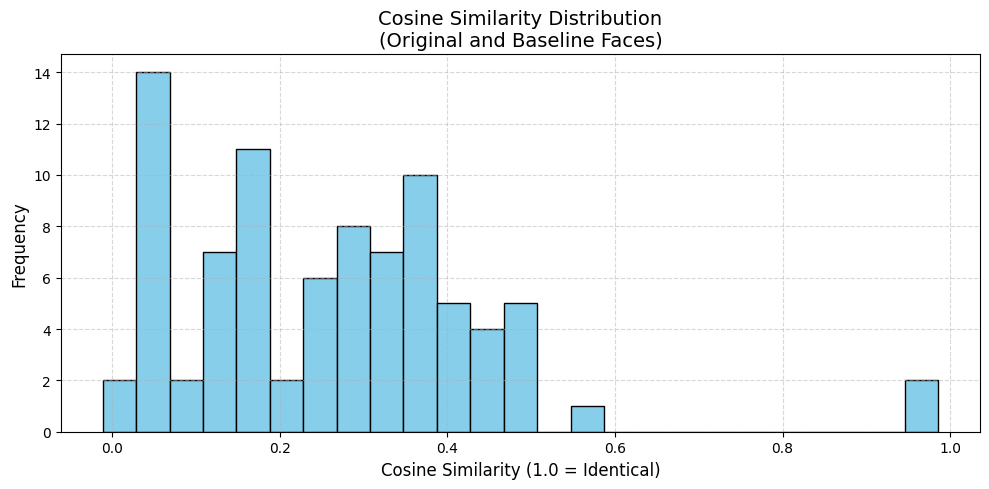

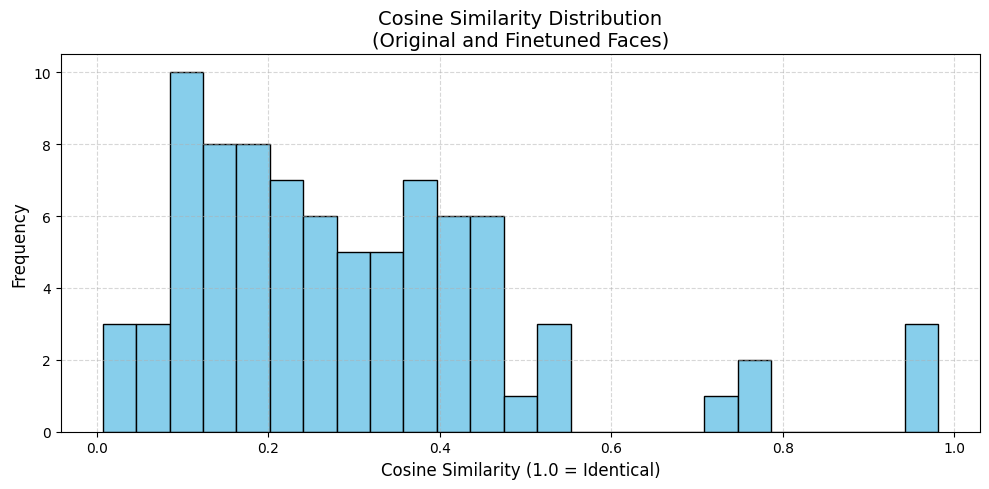

🔎 Mean Cosine Similarity for baseline: 0.2651
🔎 Mean Cosine Similarity for finetuned: 0.3017


In [33]:
import os
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

def compute_cosine_similarities(original_folder, aged_folder):
    sims = []

    for fname in tqdm(os.listdir(aged_folder)):
        if not fname.endswith(".jpg"):
            continue

        # Match with original image (strip _aged_xx.jpg)
        orig_name = fname.split("_aged")[0]
        orig_path = os.path.join(original_folder, orig_name)
        #print(orig_path)
        aged_path = os.path.join(aged_folder, fname)
        #print(aged_path)

        if not os.path.exists(orig_path):
            print(f"⚠️ Original not found for {fname}")
            continue

        emb_orig = get_embedding_with_deepface(orig_path)
        emb_aged = get_embedding_with_deepface(aged_path)

        if emb_orig is None or emb_aged is None:
            continue

        # Compute cosine similarity
        sim = cosine_similarity([emb_orig], [emb_aged])[0][0]
        sims.append(sim)

    return sims

cosine_scores_baseline = compute_cosine_similarities(
    original_folder=CLEAN_IMAGE_FOLDER,
    aged_folder=AGED_IMAGE_FOLDER_BASELINE  # or outputs/baselines
)

# Run for your data
cosine_scores_finetuned = compute_cosine_similarities(
    original_folder=CLEAN_IMAGE_FOLDER,
    aged_folder=AGED_IMAGE_FOLDER  # or outputs/baselines
)

# 📈 Plot results
plt.figure(figsize=(10, 5))
plt.hist(cosine_scores_baseline, bins=25, color="skyblue", edgecolor="black")
plt.title("Cosine Similarity Distribution\n(Original and Baseline Faces)", fontsize=14)
plt.xlabel("Cosine Similarity (1.0 = Identical)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# 📈 Plot results
plt.figure(figsize=(10, 5))
plt.hist(cosine_scores_finetuned, bins=25, color="skyblue", edgecolor="black")
plt.title("Cosine Similarity Distribution\n(Original and Finetuned Faces)", fontsize=14)
plt.xlabel("Cosine Similarity (1.0 = Identical)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

print(f"🔎 Mean Cosine Similarity for baseline: {np.mean(cosine_similarity_baseline):.4f}")

print(f"🔎 Mean Cosine Similarity for finetuned: {np.mean(cosine_similarity_finetuned):.4f}")
